In [4]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [2]:
from pathlib import Path
import re
import numpy as np
from scipy import signal

def butter_bandpass(cutoff, fs, order=5):
    normal_cutoff = [cutoff[0], cutoff[1]]
    b, a = signal.butter(order, normal_cutoff, btype='band', analog=False, fs=fs)
    return b, a

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

tsdir = '/home/anton/Documents/Tulane/Research/UKBB/Cypress/ts'
outdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB2/conn'

tr = 0.735

psRest = []
psTask = []
a,b = np.triu_indices(264,1)

for i,ts in enumerate(Path(tsdir).iterdir()):
    m = re.match('(\d+)_(\d+)_(\d)_0_ts.csv', ts.name)
    if not m:
        continue
    subid = int(m.group(1)) # e.g. 1005815 (bad subject)
    field = int(m.group(2)) # e.g. 20249, 20227
    scannum = int(m.group(3)) # e.g. 2,3
    try:
        data = np.genfromtxt(str(ts), delimiter=',')
        ts1 = butter_bandpass_filter(data, [0.01, 0.15], 1/tr)
        p = np.corrcoef(ts1)
        p = remap(p)[a,b]
        if np.sum(np.isnan(p)) > 0:
            print(f'Bad sub {subid}')
            continue
        np.save(f'{outdir}/{subid}_task-{field}-{scannum}_fc.npy', p)
        if field == 20227:
            psRest.append(p)
        elif field == 20249:
            psTask.append(p)
        if i % 100 == 0:
            print(f'Done {i}')
    except:
        print(f'Bad sub {subid}')
        continue
    
print('Complete')
print(len(psRest), len(psTask))

Done 0
Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Bad sub 4199371
Done 1200
Done 1300
Done 1400
Done 1500
Done 1600
Done 1700
Done 1800


/home/anton/.local/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/anton/.local/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Bad sub 5202346
Done 1900
Done 2000
Done 2100
Done 2200
Done 2300
Done 2400
Done 2500
Done 2600
Done 2700
Done 2800
Done 2900
Done 3000
Done 3100
Done 3200
Done 3300
Bad sub 4124161
Done 3400
Done 3500
Done 3600
Done 3700
Done 3800
Bad sub 5160713
Done 3900
Done 4000
Done 4100
Done 4200
Done 4300
Done 4400
Done 4500
Done 4600
Bad sub 2848783
Done 4700
Done 4800
Done 4900
Done 5000
Done 5100
Bad sub 3360472
Done 5200
Done 5300
Done 5400
Done 5500
Done 5600
Done 5700
Done 5800
Done 5900
Done 6000
Done 6100
Done 6200
Done 6300
Done 6400
Done 6500
Done 6600
Done 6700
Done 6800
Done 6900
Done 7000
Done 7100
Bad sub 4138161
Done 7200
Done 7300
Done 7400
Done 7500
Done 7600
Done 7700
Done 7800
Done 7900
Bad sub 5595379
Done 8000
Done 8100
Done 8200
Done 8300
Done 8400
Done 8500
Done 8600
Done 8700
Done 8800
Done 8900
Done 9000
Done 9100
Done 9200
Done 9300
Done 9400
Done 9500
Bad sub 5569072
Done 9600
Done 9700
Done 9800
Done 9900
Done 10000
Done 10100
Done 10200
Bad sub 3333293
Done 10300
Ba

In [3]:
from pathlib import Path
import numpy as np
import re

fcdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB2/conn'

ps = []

for i,pname in enumerate(Path(fcdir).iterdir()):
    m = re.match('([^_]+)_task-([^-])+-(.)_fc.npy', pname.name)
    group = int(m.group(2))
    ses = int(m.group(3))
    if group != 20227 or ses != 2:
        continue
    p = np.load(str(pname))
    ps.append(p)
    if i % 2000 == 0:
        print(f'Done {i}')

ps = np.stack(ps)

print(ps.shape)

Done 0
Done 2000
Done 4000
Done 6000
Done 8000
Done 12000
Done 14000
Done 16000
Done 18000
Done 20000
Done 22000
Done 24000
Done 26000
Done 28000
Done 32000
Done 34000
Done 36000
Done 40000
Done 42000
Done 44000
Done 48000
Done 50000
Done 52000
Done 54000
Done 56000
Done 60000
Done 62000
Done 64000
Done 66000
Done 68000
Done 70000
Done 72000
Done 74000
Done 76000
Done 78000
Done 80000
(76311, 34716)


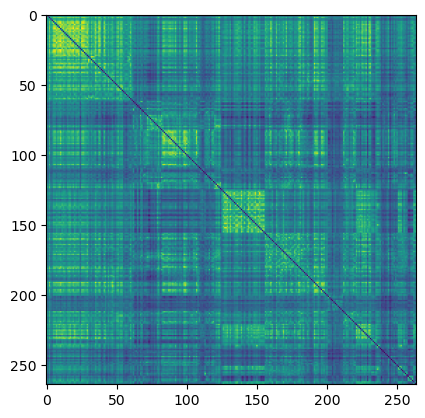

In [5]:
import matplotlib.pyplot as plt

avg = np.mean(ps, axis=0)

plt.imshow(vec2mat(avg))
plt.
plt.show()

In [ ]:
# Make preliminary demographics file
# With just polygenic risk scores and race

import pandas as pd

df1 = pd.read_csv('/home/anton/Documents/Tulane/Research/UKBB/ukb669358.csv', delimiter=',')

df1 